# **Agrupación Avance 2 Proyecto**

#### Integrantes
- *Santiago Cassiano Rozo*
- *Fabian Camilo Castro Lozano*
- *David Jose Leon Aroca*

#### Accedemos a google drive para traer más facilmente a nuestros datasets

In [140]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Importamos las librerias que utilizaremos a lo largo de la agrupación

In [141]:
!pip install kmodes

In [142]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA

# 1. Agrupación con el algoritmo K-means.

#### Leemos el dataset limpio que generamos en la fase de preprocesamiento y solo almacenamos las variables numericas.

In [143]:
df_num_original = pd.read_csv("/content/gdrive/Shareddrives/Minería de datos/Proyecto/I. Dataset/dataset_limpiado.csv", sep=",")
#Eliminamos la columna de los indices (Unnamed 0) y las que tienen variables categoricas excepto la clase
df_num_original.drop(columns=['Unnamed: 0','job','marital','education','default','housing','loan','contact','day','month','poutcome'], inplace=True)

df_num_original

,age,balance,duration,campaign,pdays,previous,y
0,58,2143,261,1,194,0,no
1,44,29,151,1,194,0,no
2,33,2,76,1,194,0,no
3,47,1506,92,1,194,0,no
4,33,1,198,1,194,0,no
...,...,...,...,...,...,...,...
41085,23,113,266,1,194,0,yes
41086,25,505,386,2,194,0,yes
41087,51,825,977,3,194,0,yes
41088,71,1729,456,2,194,0,yes


#### Creamos dos datasets. Uno con las clases de todos los elementos y otro con todos los datos menos el valor de la clase, esto para poder hacer la agrupación y posteriormente la validación externa.

In [144]:
#Dataframe solo con los atributos numericos
df_num_original_data = df_num_original.drop(columns='y')

#Dataframe con la columna que indica la clase de cada registro. 1 significa "yes", 0 significa "no"
df_num_original_classes = df_num_original['y'].replace(['no', 'yes'],[0, 1])

df_num_original_data

,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,194,0
1,44,29,151,1,194,0
2,33,2,76,1,194,0
3,47,1506,92,1,194,0
4,33,1,198,1,194,0
...,...,...,...,...,...,...
41085,23,113,266,1,194,0
41086,25,505,386,2,194,0
41087,51,825,977,3,194,0
41088,71,1729,456,2,194,0


#### Estandarizamos los datos de cada columna para que tengan media=0 y desviación estandar=1, esto para prevenir que los atributos con rangos de valores más grandes tengan más peso durante el algoritmo K-means.

In [145]:
#Creamos el objeto escalador
scaler = StandardScaler()
#Ajustamos el escalador a los datos
scaler.fit(df_num_original_data)
#Escalamos los datos y creamos un nuevo dataframe con los datos standarizados
df_num_standard_data = pd.DataFrame(data=scaler.transform(df_num_original_data), columns=df_num_original_data.columns)
df_num_standard_data

,age,balance,duration,campaign,pdays,previous
0,1.716911,0.613195,0.127278,-0.740412,-0.091891,-0.347471
1,0.332788,-0.603598,-0.440774,-0.740412,-0.091891,-0.347471
2,-0.754738,-0.619139,-0.828081,-0.740412,-0.091891,-0.347471
3,0.629385,0.246545,-0.745456,-0.740412,-0.091891,-0.347471
4,-0.754738,-0.619715,-0.198061,-0.740412,-0.091891,-0.347471
...,...,...,...,...,...,...
41085,-1.743397,-0.555249,0.153098,-0.740412,-0.091891,-0.347471
41086,-1.545665,-0.329618,0.772791,-0.234769,-0.091891,-0.347471
41087,1.024849,-0.145430,3.824775,0.270874,-0.091891,-0.347471
41088,3.002168,0.374901,1.134278,-0.234769,-0.091891,-0.347471


#### A continuación vamos a ejecutar el algoritmo de K-Means para que conforme unicamente 2 clusters, esto para observar si logra formar un cluster donde esten todas las personas que dijeron "no" al deposito a plazo y otro en el que esten todas las personas que dijeran "si".

In [146]:
km = KMeans(n_clusters=2, n_init=20, init="k-means++", random_state=0)
km = km.fit(df_num_standard_data)
#Imprimimos la matriz de confusión
confusion_matrix_kmeans = confusion_matrix(df_num_original_classes, km.labels_, labels=[0, 1])
#Almacenamos en una variable los labels generados por el algoritmo para posteriormente usarlos en la validacion interna
labels_kmeans_2_clusters = km.labels_
print(confusion_matrix_kmeans)

[[34157  2831]
 [ 3698   404]]


A partir de la matriz de confusión se observa que el algoritmo no logra agrupar en dos clusters a las personas que dijeron "no" y a las personas que dijeron "si". En especial parece equivocarse en que no logra reconocer a las personas que dijeron "si".

A continuación realizaremos PCA al conjunto de datos para tener una aproximación que nos permita visualizar los datos originales y los grupos conformados por el algoritmo k-means.

In [147]:
#Aplicamos PCA al conjunto de datos
numComponents = 2
pca = PCA(n_components=numComponents)
data_pca = pca.fit_transform(df_num_standard_data)
df_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
#Mostramos los resultados de PCA
df_pca

,PC1,PC2
0,-0.853018,1.178248
1,0.022143,-0.129187
2,0.435755,-0.590789
3,-0.404621,0.295336
4,0.527712,-0.305422
...,...,...
41085,0.982560,-0.361120
41086,0.733660,-0.175032
41087,-0.163784,1.694791
41088,-1.371456,1.551209


Text(0, 0.5, 'PC2')

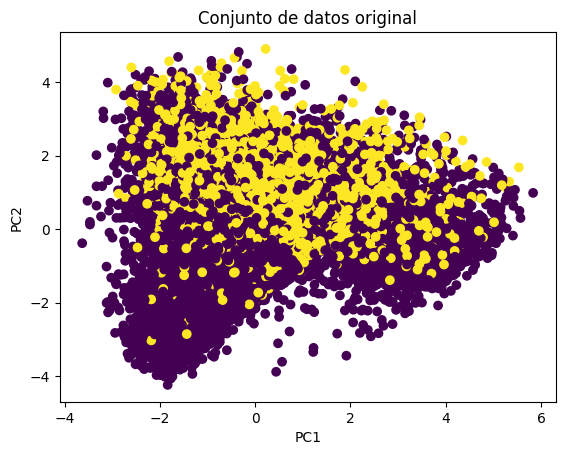

In [148]:
plt.scatter(df_pca['PC1'],df_pca['PC2'],c=df_num_original_classes.values)
plt.title('Conjunto de datos original')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

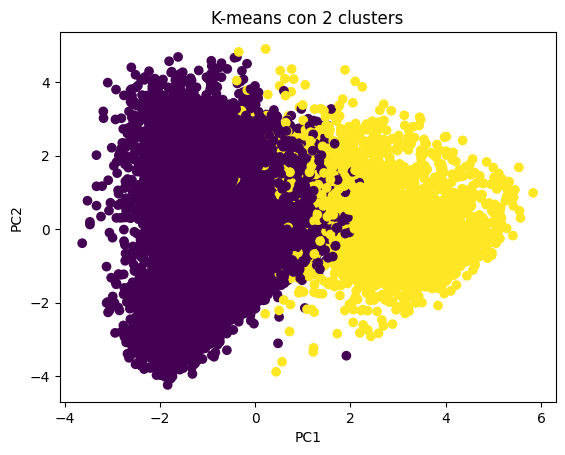

In [149]:
plt.scatter(df_pca['PC1'],df_pca['PC2'],c=km.labels_)
plt.title('K-means con 2 clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

#### Como analisis adicional, vamos a ejecutar el algoritmo de K-Means con diferentes valores de K y calculamos el SSE (Inercia) para cada caso y haremos la grafica de codo la cual nos indique la cantidad de clusters en la que idealmente deberiamos separar el conjunto de datos.

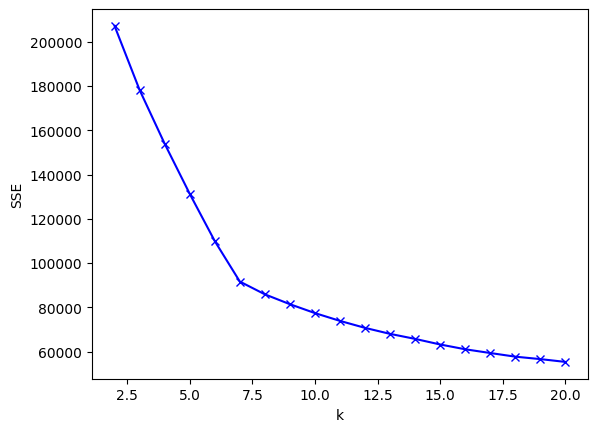

In [150]:
# Se ejecuta Kmeans, para valores de k entre 2 y 20 y se grafica la inercia con respecto al número de clusters
Sum_of_squared_distances = []
K = range(2,21)
for k in K:
    km = KMeans(n_clusters=k, n_init=10, init="k-means++")
    km = km.fit(df_num_standard_data)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

A partir de lo anterior observamos que el numero ideal de clusters parece ser 7. Ejecutaremos K-Means con dicha cantidad de clusters y analizaremos los centroides y el tamaño de los clusters encontrados, de manera que podamos ver que caracteristicas de los clientes conforman cada cluster.

In [151]:
km = KMeans(n_clusters=7, n_init=10, init="k-means++", random_state=4)
km = km.fit(df_num_standard_data)

#Imprimimos los centroides
print("Coordenadas de los centroides: ")
print(km.cluster_centers_)
print()
#Imprimos dos arreglos, uno con el identificador de cada cluster y otro con la cantidad de elementos en cada cluster
print("Identificador de los grupos y la cantidad de personas en cada uno de ellos: ")
print(np.unique(km.labels_, return_counts = True))

Coordenadas de los centroides: 
[[ 0.01274394 -0.20806736 -0.41295252  2.41014179 -0.08763697 -0.3155687 ]
 [ 0.21467442  2.82049418 -0.08327082 -0.12477905 -0.15788995 -0.17886307]
 [-0.22694947 -0.2109863  -0.11773463 -0.26843547  3.2942485   1.83668206]
 [ 1.1128403  -0.19995174 -0.29668167 -0.21835187 -0.1008471  -0.28883046]
 [-0.69860641 -0.30005489 -0.28454053 -0.29162666 -0.09647782 -0.30930355]
 [-0.04533114  0.10011085 -0.03280266 -0.3068451  -1.7648661   2.73273232]
 [-0.16387972 -0.14172754  2.18152583 -0.16941603 -0.10473492 -0.27574494]]

Identificador de los grupos y la cantidad de personas en cada uno de ellos: 
(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), array([ 3776,  2923,  2358, 10165, 15230,  2281,  4357]))


Ahora para cada uno de los clusters identificados, vamos a ver el porcentaje de elementos que pertenecen a la clase Yes y cuantos a la clase No:

In [152]:
#Creamos un dataframe auxiliar que nos ayudara en la labor
aux_df = pd.concat([pd.Series(km.labels_), df_num_original_classes], axis=1)
aux_df.columns = ["kmeans","real"]

#Imprimimos la proporcion de datos de clase 0 y 1 en el dataset completo como valores de referencia
print("Proporcion personas clase 0 en el dataset completo: {}".format(len(aux_df[aux_df['real'] == 0])/aux_df.shape[0]))
print("Proporcion personas clase 1 en el dataset completo: {}".format(len(aux_df[aux_df['real'] == 1])/aux_df.shape[0]))
print() #Un espacio para facilitar la visualización

#Hacemos un bucle para imprimir la cantidad de casos en todos los grupos:
for i in range(len(np.unique(km.labels_))):
    print("Proporcion personas clase {} en el cluster {}: {}".format(0,i,len(aux_df[(aux_df['kmeans'] == i) & (aux_df['real'] == 0)])/len(aux_df[aux_df['kmeans'] == i]) ))
    print("Proporcion personas clase {} en el cluster {}: {}".format(1,i,len(aux_df[(aux_df['kmeans'] == i) & (aux_df['real'] == 1)])/len(aux_df[aux_df['kmeans'] == i]) ))
    print() #Un espacio para facilitar la visualización

Proporcion personas clase 0 en el dataset completo: 0.9001703577512776
Proporcion personas clase 1 en el dataset completo: 0.09982964224872232

Proporcion personas clase 0 en el cluster 0: 0.975635593220339
Proporcion personas clase 1 en el cluster 0: 0.024364406779661018

Proporcion personas clase 0 en el cluster 1: 0.8932603489565515
Proporcion personas clase 1 en el cluster 1: 0.10673965104344851

Proporcion personas clase 0 en el cluster 2: 0.9253604749787956
Proporcion personas clase 1 en el cluster 2: 0.07463952502120441

Proporcion personas clase 0 en el cluster 3: 0.9421544515494343
Proporcion personas clase 1 en el cluster 3: 0.057845548450565665

Proporcion personas clase 0 en el cluster 4: 0.9483913328956007
Proporcion personas clase 1 en el cluster 4: 0.051608667104399215

Proporcion personas clase 0 en el cluster 5: 0.6817185444980272
Proporcion personas clase 1 en el cluster 5: 0.31828145550197284

Proporcion personas clase 0 en el cluster 6: 0.673628643562084
Proporcion 

Se observa que en general los clusters 0, 1, 2, 3 y 4 contienen principalmente elementos de la clase 0 y mantienen una proporción de personas de la clase 0 y la clase 1 similar a la que tiene el dataset completo.

Por otra parte, en los cluster 5 y 6 se ve que la proporcón de elementos de la clase 1 aumenta bastante, pero igualmente se ve que la gran mayoria corresponde a elementos de clase 0.

A partir de estos resultados no se logra identificar claramente caracteristicas que permitan identificar los datos de una clase de la otra. Tal vez sea necesaria más información del cliente para poder realzar una agrupación más clara entre clientes que aceptan el deposito a plazo y los que no.


A continuaciónn graficaremos los clusters obtenidos sobre el conjunto de datos reducido a 2 dimensiones con PCA, esto para facilitar la visualización de los clusters obtenidos.

Text(0, 0.5, 'PC2')

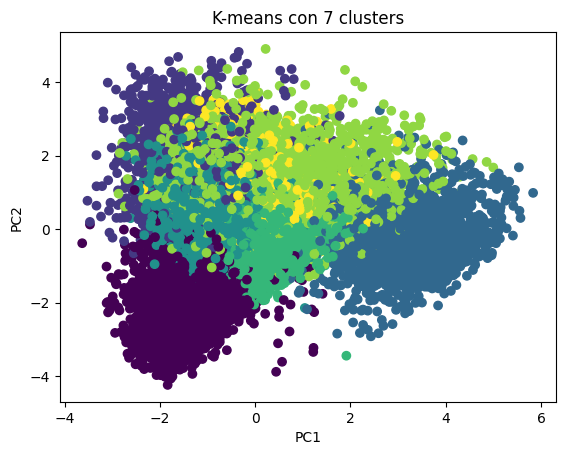

In [153]:
plt.scatter(df_pca['PC1'],df_pca['PC2'],c=km.labels_)
plt.title('K-means con 7 clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [154]:
print(f"Coeficiente de Davies Bouldin: {metrics.davies_bouldin_score(df_num_standard_data, aux_df['kmeans']):5f}")
print(f"Coeficiente de Silhouette: {metrics.silhouette_score(df_num_standard_data,aux_df['kmeans']):5f}")

Coeficiente de Davies Bouldin: 1.011120
Coeficiente de Silhouette: 0.295245


# Algoritmo K-modes

#### Leemos el dataset limpio que generamos en la anterior entrega y le eliminamos las columnas de variables numericas

In [155]:
df_original = pd.read_csv("/content/gdrive/Shareddrives/Minería de datos/Proyecto/I. Dataset/dataset_limpiado.csv", sep=",")
#Eliminamos la columna de los indices (Unnamed 0) y las que tienen variables numericas. Tambien eliminamos
df_cat = df_original.drop(columns=['Unnamed: 0','age','balance','duration','campaign','pdays','previous','day'])

df_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,cellular,may,failure,no
1,technician,single,secondary,no,yes,no,cellular,may,failure,no
2,entrepreneur,married,secondary,no,yes,yes,cellular,may,failure,no
3,blue-collar,married,secondary,no,yes,no,cellular,may,failure,no
4,blue-collar,single,secondary,no,no,no,cellular,may,failure,no
...,...,...,...,...,...,...,...,...,...,...
41085,student,single,tertiary,no,no,no,cellular,nov,failure,yes
41086,technician,single,secondary,no,no,yes,cellular,nov,failure,yes
41087,technician,married,tertiary,no,no,no,cellular,nov,failure,yes
41088,retired,divorced,primary,no,no,no,cellular,nov,failure,yes


#### Creamos un dataset solo con las variables categoricas y otro unicamente con el valor de la clase en cada registro. En este caso clase 0 sera igual a "no" en el atributo y, lo cual indicaria que la persona no acepto el deposito a plazo. La clase 1 sera igual a "yes", es decir que la persona si aceptó el deposito a plazo.

In [156]:
#Dataframe solo con los atributos categoricos
df_cat_data = df_cat.drop(columns='y')

#Dataframe solo con las clases
df_cat_classes = df_cat['y'].replace(['no', 'yes'],[0, 1])

df_cat_data

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,cellular,may,failure
1,technician,single,secondary,no,yes,no,cellular,may,failure
2,entrepreneur,married,secondary,no,yes,yes,cellular,may,failure
3,blue-collar,married,secondary,no,yes,no,cellular,may,failure
4,blue-collar,single,secondary,no,no,no,cellular,may,failure
...,...,...,...,...,...,...,...,...,...
41085,student,single,tertiary,no,no,no,cellular,nov,failure
41086,technician,single,secondary,no,no,yes,cellular,nov,failure
41087,technician,married,tertiary,no,no,no,cellular,nov,failure
41088,retired,divorced,primary,no,no,no,cellular,nov,failure


Ahora se aplicara el algoritmo k-modes para formar 2 clusters.

In [157]:
k_modes = KModes(n_clusters=2, init='Huang', n_init=10, verbose=0)
clusters = k_modes.fit_predict(df_cat_data)
#Almacenamos los labels que asigna el algoritmo a los datos para posteriormente utilizarlos en la validación interna
labels_kmodes_2_clusters = k_modes.labels_

In [158]:
print(k_modes.cluster_centroids_)

[['blue-collar' 'married' 'secondary' 'no' 'yes' 'no' 'cellular' 'may'
  'failure']
 ['management' 'married' 'tertiary' 'no' 'no' 'no' 'cellular' 'aug'
  'failure']]


In [159]:
confusion_matrix_kmodes = confusion_matrix(df_cat_classes,k_modes.labels_, labels=[0, 1])
print(confusion_matrix_kmodes)

[[26291 10697]
 [ 2353  1749]]


Se observa que forma dos clusters de tamaño similar, donde se mezclan datos de ambas clases en igual medida. No parece que a partir de los datos actuales logre distinguir las dos clases de clientes del conjunto de datos.

# Algoritmos Jerarquicos

In [160]:
import pandas as pd
import numpy as np
from sklearn import preprocessing,cluster,metrics
import matplotlib.pyplot as plt
from tabulate import tabulate

Funciones auxiliares

In [161]:
def get_hierarchical_clusters(n_clusters , df):
    # Calculates via sklearn the resulting labels for hierarchical clusters using three linkages: single,complete and average
    single_link_cluster = cluster.AgglomerativeClustering(n_clusters= n_clusters,linkage="single")
    single_link_cluster.fit(df)

    complete_link_cluster = cluster.AgglomerativeClustering(n_clusters=n_clusters,linkage="complete")
    complete_link_cluster.fit(df)

    average_link_cluster = cluster.AgglomerativeClustering(n_clusters=n_clusters,linkage="average")
    average_link_cluster.fit(df)

    return single_link_cluster.labels_ , complete_link_cluster.labels_ , average_link_cluster.labels_

def list_cm(cm,classes):     #función para generar de una forma más visual la matriz de confusión
    if len(cm)==2:
      row_0 =['','Valor','Verdadero']
      row_1 =['-',classes[0],classes[1]]
      row_2 =[classes[0],cm[0,0],cm[1,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1]]
      table = zip(row_0,row_1, row_2, row_3)
      headers = ['', '', 'Valor', 'Predicho']
      return print(tabulate(table, headers=headers, floatfmt=".4f"))
    else:
      row_0 =['','Valor','Verdadero','']
      row_1 =['-',classes[0],classes[1],classes[2]]
      row_2 =[classes[0],cm[0,0],cm[1,0],cm[2,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1],cm[2,1]]
      row_4 =[classes[2],cm[0,2],cm[1,2],cm[2,2]]
      table = zip(row_0,row_1, row_2, row_3, row_4)
      headers = ['', '', 'Valor', 'Predicho', '']
      return print(tabulate(table, headers=headers, floatfmt=".4f"))


def validation(df, external_validation=True):
    # Df is the dataframe with the original values and new columns with the new labels from clustering algorithms
    # use external_validation = false to disable this option
    if external_validation:
        # Matriz de confusion single_link_cluster
        single_link_conf = metrics.confusion_matrix(df["y"] , df["single_link_cluster"])

        # Matriz de confusion complete_link_cluster
        complete_link_conf = metrics.confusion_matrix(df["y"] , df["complete_link_cluster"])

        # Matriz de confusion group average
        group_average_conf = metrics.confusion_matrix(df["y"] , df["group_average_cluster"])

        print("Matrices de confusión:")
        print("--------------------------------------------------")
        print("Matriz de confusión single-link:")
        list_cm(single_link_conf, ["no","yes"])
        print("--------------------------------------------------")
        print("Matriz de confusión complete-link:")
        list_cm(complete_link_conf, ["no","yes"])
        print("--------------------------------------------------")
        print("Matriz de confusión group average:")
        list_cm(group_average_conf, ["no","yes"])
        print("--------------------------------------------------\n\n")

        #Validación externa


        accuracy_single_link = (single_link_conf[0,0] + single_link_conf[1,1])/df.shape[0]
        accuracy_complete_link = (complete_link_conf[0,0] + complete_link_conf[1,1])/df.shape[0]
        accuracy_group_average = (group_average_conf[0,0] + group_average_conf[1,1])/df.shape[0]

        precision_single_link = single_link_conf[1,1]/ (single_link_conf[1,1] + single_link_conf[0,1]) if (single_link_conf[1,1] + single_link_conf[0,1]) > 0 else 0
        precision_complete_link = complete_link_conf[1,1]/ (complete_link_conf[1,1] + complete_link_conf[0,1]) if (complete_link_conf[1,1] + complete_link_conf[0,1]) > 0 else 0
        precision_group_average = group_average_conf[1,1]/ (group_average_conf[1,1] + group_average_conf[0,1]) if (group_average_conf[1,1] + group_average_conf[0,1]) > 0 else 0

        recall_single_link = single_link_conf[1,1]/ (single_link_conf[1,1] + single_link_conf[1,0]) if (single_link_conf[1,1] + single_link_conf[1,0]) > 0 else 0
        recall_complete_link = complete_link_conf[1,1]/ (complete_link_conf[1,1] + complete_link_conf[1,0]) if (complete_link_conf[1,1] + complete_link_conf[1,0]) > 0 else 0
        recall_group_average = group_average_conf[1,1]/ (group_average_conf[1,1] + group_average_conf[1,0]) if (group_average_conf[1,1] + group_average_conf[1,0]) > 0 else 0

        f1_score_single_link = 2/(1/precision_single_link + 1/recall_single_link) if precision_single_link > 0 and recall_single_link > 0 else 0
        f1_score_complete_link = 2/(1/precision_complete_link + 1/recall_complete_link) if precision_complete_link > 0 and precision_complete_link > 0 else 0
        f1_score_group_average = 2/(1/precision_group_average + 1/recall_group_average) if recall_group_average > 0 and recall_group_average > 0 else 0

        print("Medidas de validación externa")
        print("--------------------------------------------------")
        print("Single Link")
        print(f"Accuracy = {accuracy_single_link}")
        print(f"Precision = {precision_single_link}")
        print(f"Recall = {recall_single_link}")
        print(f"F1 score = {f1_score_single_link}")
        print("--------------------------------------------------")
        print("Complete Link")
        print(f"Accuracy = {accuracy_complete_link}")
        print(f"Precision = {precision_complete_link}")
        print(f"Recall = {recall_complete_link}")
        print(f"F1 score = {f1_score_complete_link}")
        print("--------------------------------------------------")
        print("Group average")
        print(f"Accuracy = {accuracy_group_average}")
        print(f"Precision = {precision_group_average}")
        print(f"Recall = {recall_group_average}")
        print(f"F1 score = {f1_score_group_average}")

    #Validación interna
    print("Medidas de validación interna:")
    print("--------------------------------------------------")
    print(f"Coeficiente de Davies Bouldin single-link: {metrics.davies_bouldin_score(df.iloc[:,0:6] , df['single_link_cluster'].transpose()):5f}")
    print(f"Coeficiente de Silhouette single-link: {metrics.silhouette_score(df.iloc[:,0:6] , df['single_link_cluster'].transpose()):5f}")
    print("--------------------------------------------------")
    print(f"Coeficiente de Davies Bouldin complete-link: {metrics.davies_bouldin_score(df.iloc[:,0:6] , df['complete_link_cluster'].transpose()):5f}")
    print(f"Coeficiente de Silhouette complete-link: {metrics.silhouette_score(df.iloc[:,0:6] , df['complete_link_cluster'].transpose()):5f}")
    print("--------------------------------------------------")
    print(f"Coeficiente de Davies Bouldin group average: {metrics.davies_bouldin_score(df.iloc[:,0:6] , df['group_average_cluster'].transpose()):5f}")
    print(f"Coeficiente de Silhouette group average: {metrics.silhouette_score(df.iloc[:,0:6] , df['group_average_cluster'].transpose()):5f}")


Carga y estandarización de los datos numéricos

In [162]:
numeric_csv = pd.read_csv("numerico.csv", sep=",")
hierarchical_df = numeric_csv.loc[:,["age","balance","duration","pdays", "campaign" ,"previous" , "y"]]
hierarchical_df

,age,balance,duration,pdays,campaign,previous,y
0,58,2143,261,194,1,0,0
1,44,29,151,194,1,0,0
2,33,2,76,194,1,0,0
3,47,1506,92,194,1,0,0
4,33,1,198,194,1,0,0
...,...,...,...,...,...,...,...
41085,23,113,266,194,1,0,1
41086,25,505,386,194,2,0,1
41087,51,825,977,194,3,0,1
41088,71,1729,456,194,2,0,1


In [163]:
scaler = preprocessing.StandardScaler()
scaler.fit(hierarchical_df.iloc[:,0:6])
standardized_dataframe = pd.DataFrame(scaler.transform(hierarchical_df.iloc[:,0:6]))
standardized_dataframe.columns = hierarchical_df.iloc[:,0:6].columns
standardized_dataframe

,age,balance,duration,pdays,campaign,previous
0,1.716911,0.613195,0.127278,-0.091891,-0.740412,-0.347471
1,0.332788,-0.603598,-0.440774,-0.091891,-0.740412,-0.347471
2,-0.754738,-0.619139,-0.828081,-0.091891,-0.740412,-0.347471
3,0.629385,0.246545,-0.745456,-0.091891,-0.740412,-0.347471
4,-0.754738,-0.619715,-0.198061,-0.091891,-0.740412,-0.347471
...,...,...,...,...,...,...
41085,-1.743397,-0.555249,0.153098,-0.091891,-0.740412,-0.347471
41086,-1.545665,-0.329618,0.772791,-0.091891,-0.234769,-0.347471
41087,1.024849,-0.145430,3.824775,-0.091891,0.270874,-0.347471
41088,3.002168,0.374901,1.134278,-0.091891,-0.234769,-0.347471


# ⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️

### No ejecutar la celda siguiente en el colab, ya que consume mucha memoria y hace que colapse el notebook. Ejecutarla en local o cargue el conjunto de datos 2_clusters_hierarchical_clustering_standardized.csv

# ⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️

In [164]:
# No ejecutar en el colab! ejecute en local
'''
clusters = get_hierarchical_clusters(2 , standardized_dataframe)
standardized_dataframe["single_link_cluster"] = clusters[0]
standardized_dataframe["complete_link_cluster"] = clusters[1]
standardized_dataframe["group_average_cluster"] = clusters[2]
standardized_dataframe["y"] = hierarchical_df.loc[:,["y"]]
standardized_dataframe
'''

'\nclusters = get_hierarchical_clusters(2 , standardized_dataframe)\nstandardized_dataframe["single_link_cluster"] = clusters[0]\nstandardized_dataframe["complete_link_cluster"] = clusters[1]\nstandardized_dataframe["group_average_cluster"] = clusters[2]\nstandardized_dataframe["y"] = hierarchical_df.loc[:,["y"]]\nstandardized_dataframe\n'

In [165]:
# Cargar el csv con los datos obtenidos de una ejecución en local

# 2 clusters
standardized_dataframe = pd.read_csv("2_clusters_hierarchical_clustering_standardized.csv" , sep=",")
standardized_dataframe

,Unnamed: 0,age,balance,duration,pdays,campaign,previous,single_link_cluster,complete_link_cluster,average_link_cluster,y,group_average_cluster
0,0,1.716911,0.613195,0.127278,-0.091891,-0.740412,-0.347471,0,1,0,0,0
1,1,0.332788,-0.603598,-0.440774,-0.091891,-0.740412,-0.347471,0,1,0,0,0
2,2,-0.754738,-0.619139,-0.828081,-0.091891,-0.740412,-0.347471,0,1,0,0,0
3,3,0.629385,0.246545,-0.745456,-0.091891,-0.740412,-0.347471,0,1,0,0,0
4,4,-0.754738,-0.619715,-0.198061,-0.091891,-0.740412,-0.347471,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41085,41085,-1.743397,-0.555249,0.153098,-0.091891,-0.740412,-0.347471,0,1,0,1,0
41086,41086,-1.545665,-0.329618,0.772791,-0.091891,-0.234769,-0.347471,0,1,0,1,0
41087,41087,1.024849,-0.145430,3.824775,-0.091891,0.270874,-0.347471,0,1,0,1,0
41088,41088,3.002168,0.374901,1.134278,-0.091891,-0.234769,-0.347471,0,1,0,1,0


Graficando con PCA

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2')]

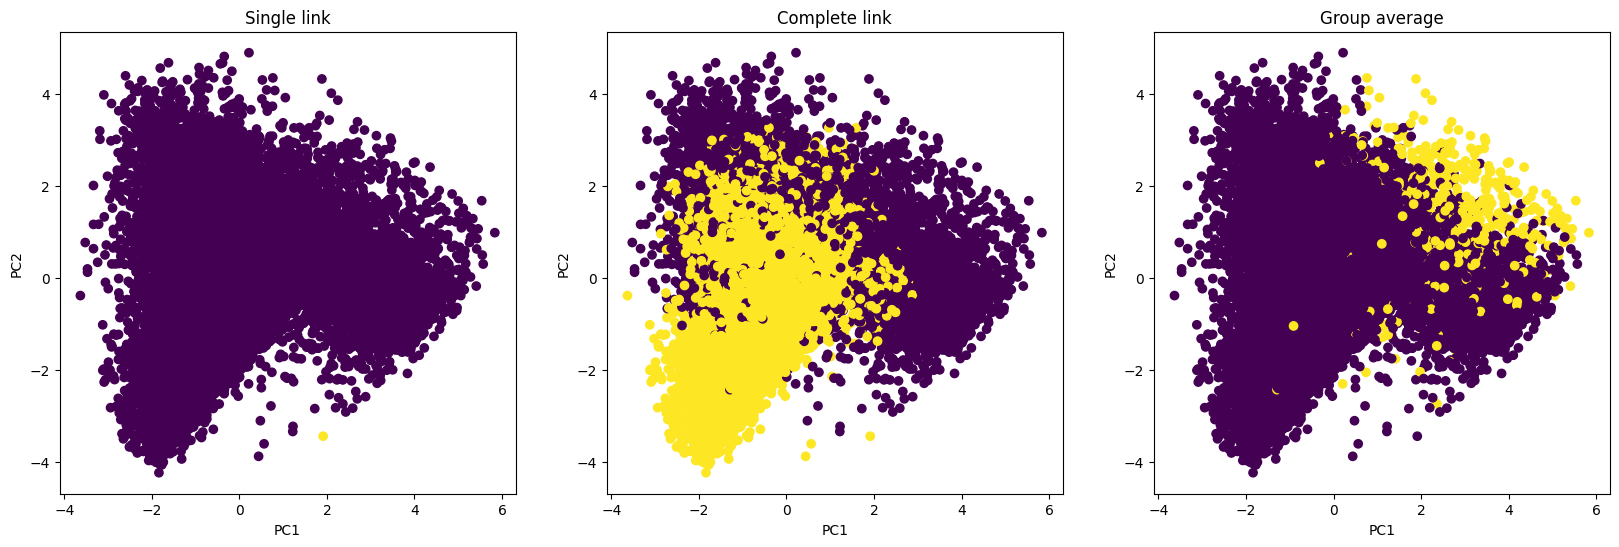

In [166]:
fig, ax = plt.subplots( figsize=(20,6), ncols=3 )

ax[0].scatter(df_pca['PC1'],df_pca['PC2'],c= np.array(standardized_dataframe.loc[:,["single_link_cluster"]]))
ax[0].title.set_text("Single link")
ax[0].set(xlabel="PC1", ylabel="PC2")
ax[1].scatter(df_pca['PC1'],df_pca['PC2'],c= np.array(standardized_dataframe.loc[:,["complete_link_cluster"]]))
ax[1].title.set_text("Complete link")
ax[1].set(xlabel="PC1", ylabel="PC2")
ax[2].scatter(df_pca['PC1'],df_pca['PC2'],c= np.array(standardized_dataframe.loc[:,["average_link_cluster"]]))
ax[2].title.set_text("Group average")
ax[2].set(xlabel="PC1", ylabel="PC2")


# Analisis y validación de los algoritmos jerarquicos, K-modes y K-means

A continuación se observa la validación interna y externa con 2 clusters de los algoritmos jerarquicos.

In [167]:
validation(standardized_dataframe)

Matrices de confusión:
--------------------------------------------------
Matriz de confusión single-link:
                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   36987    1
Verdadero  yes  4102     0
--------------------------------------------------
Matriz de confusión complete-link:
                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   5375     31613
Verdadero  yes  1011     3091
--------------------------------------------------
Matriz de confusión group average:
                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   36497    491
Verdadero  yes  3980     122
--------------------------------------------------


Medidas de validación externa
--------------------------------------------------
Single Link
Accuracy = 0.9001460209296666
Precision = 0.0
Recall = 0.0
F1 score = 0
---------------------------------

A continuación se observa la validación interna y externa con 2 clusters del algoritmo K-means.

In [168]:
print("Matriz de confusión k-means:")
list_cm(confusion_matrix_kmeans, ["no","yes"])

accuracy_kmeans = (confusion_matrix_kmeans[0,0] + confusion_matrix_kmeans[1,1])/df_num_standard_data.shape[0]
precision_kmeans = confusion_matrix_kmeans[1,1]/ (confusion_matrix_kmeans[1,1] + confusion_matrix_kmeans[0,1])
recall_kmeans = confusion_matrix_kmeans[1,1]/ (confusion_matrix_kmeans[1,1] + confusion_matrix_kmeans[1,0])
f1_score_kmeans = 2/(1/recall_kmeans + 1/precision_kmeans)


print("\nMedidas de validación externa")
print("--------------------------------------------------")
print(f"Accuracy = {accuracy_kmeans}")
print(f"Precision = {precision_kmeans}")
print(f"Recall = {recall_kmeans}")
print(f"F1 score = {f1_score_kmeans}")

#Validación interna
print()
print("Medidas de validación interna:")
print("--------------------------------------------------")
print(f"Coeficiente de Davies Bouldin: {metrics.davies_bouldin_score(df_num_standard_data,labels_kmeans_2_clusters):5f}")
print(f"Coeficiente de Silhouette: {metrics.silhouette_score(df_num_standard_data,labels_kmeans_2_clusters):5f}")

Matriz de confusión k-means:
                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   34157    2831
Verdadero  yes  3698     404

Medidas de validación externa
--------------------------------------------------
Accuracy = 0.8411048917011438
Precision = 0.12488408037094281
Recall = 0.098488542174549
F1 score = 0.11012675480441597

Medidas de validación interna:
--------------------------------------------------
Coeficiente de Davies Bouldin: 1.290022
Coeficiente de Silhouette: 0.440418


A continuación se observa la validación interna y externa con 2 clusters del algoritmo K-modes

In [169]:
print("Matriz de confusión k-modes:")
list_cm(confusion_matrix_kmodes, ["no","yes"])

accuracy_kmodes = (confusion_matrix_kmodes[0,0] + confusion_matrix_kmodes[1,1])/df_cat_data.shape[0]
precision_kmodes = confusion_matrix_kmodes[1,1]/ (confusion_matrix_kmodes[1,1] + confusion_matrix_kmodes[0,1])
recall_kmodes = confusion_matrix_kmodes[1,1]/ (confusion_matrix_kmodes[1,1] + confusion_matrix_kmodes[1,0])
f1_score_kmodes = 2/(1/recall_kmodes + 1/precision_kmodes)


print("\nMedidas de validación externa")
print("--------------------------------------------------")
print(f"Accuracy = {accuracy_kmodes}")
print(f"Precision = {precision_kmodes}")
print(f"Recall = {recall_kmodes}")
print(f"F1 score = {f1_score_kmodes}")

#Validación interna
print()
print("Medidas de validación interna:")
print("--------------------------------------------------")
print(f"Coeficiente de Davies Bouldin: {metrics.davies_bouldin_score(df_num_standard_data,labels_kmodes_2_clusters):5f}")
print(f"Coeficiente de Silhouette: {metrics.silhouette_score(df_num_standard_data,labels_kmodes_2_clusters):5f}")

Matriz de confusión k-modes:
                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   26291    10697
Verdadero  yes  2353     1749

Medidas de validación externa
--------------------------------------------------
Accuracy = 0.6824044779751764
Precision = 0.1405270769725213
Recall = 0.42637737688932226
F1 score = 0.21138506163886872

Medidas de validación interna:
--------------------------------------------------
Coeficiente de Davies Bouldin: 9.700903
Coeficiente de Silhouette: 0.012072


# DBSCAN

En el algoritmo DBSCAN utilizaremos como parametro de min_samples = 2 * *#dimensionesDataset*, esto tomando como referencia la recomendación dada por este [articulo](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd).

En nuestro caso min_samples = 12, puesto que utilizaremos un dataset con 6 dimensiones numericas.

Para seleccionar el valor de epsilon seguiremos un metodo recomendado por dos articulos, los cuales se pueden revisar en este [link](https://cdn.aaai.org/KDD/1996/KDD96-037.pdf) y este otro [link](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bdK).

Este metodo consiste en graficar la distancia que tienen todos los conjuntos de datos a su k-esimo vecino. El valor de k es igual a la cantidad de min_samples para formar un cluster, que en nuestro caso es 12. Entonces para nuestro caso calculamos la distancia de cada punto a su 12vo vecino más cercano y realizamos una grafica ordenando de mayor a menor distancia.

Una vez tenemos la grafica esta tendra una forma de codo, el punto en donde se forma el codo nos indica un valor de epsilon adecuado con el cual podremos formar clusters adecuadamente. Este metodo nos previene de utilizar un valor de epsilon demasiado grande en donde los clusters agrupen valores que pueden considerarse como ruido, sino que unicamente agrupen valores realmente cercanos entre sí.

A continuación vamos a hacer la grafica para verificar el valor de epsilon que es adecuado para el algoritmo DBSCAN sobre nuestra base de datos:

Text(0.5, 0, 'Puntos')

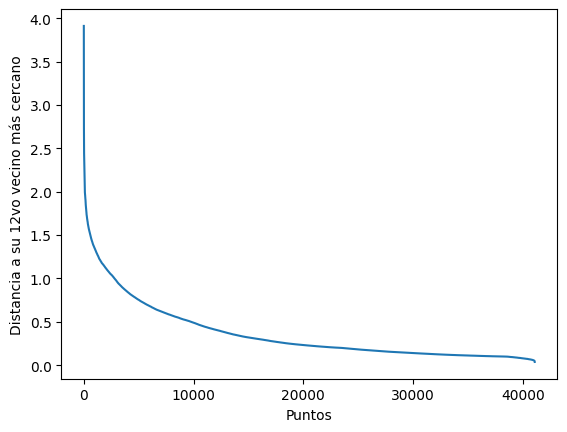

In [170]:
from sklearn.neighbors import NearestNeighbors
#Calculamos la distancia de cada punto a sus 12 puntos más cercanos.
neighbors = NearestNeighbors(n_neighbors=12)
neighbors_fit = neighbors.fit(df_num_standard_data)
distances, indices = neighbors_fit.kneighbors(df_num_standard_data)

#Almacenamos en un arreglo la distancia de cada punto a su 12vo vecino más cercano
#Y se organizan de mayor a menor
distancias_a_12vo_vecino_ordenadas = sorted(distances[:,-1], reverse = True)

#Realizamos el grafico distancia vs puntos
plt.plot(range(len(df_num_original_classes)),distancias_a_12vo_vecino_ordenadas )
plt.ylabel("Distancia a su 12vo vecino más cercano")
plt.xlabel("Puntos")

A partir de ello observamos que aproximadamente un valor de 0.5 para epsilon. Vamos a probar varios valores de epsilon cercanos a 0.5 y observaremos cuantos clusters y outliers detecta para cada caso.

In [171]:
epsilons = [0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510]
for epsilon in epsilons:
  print("Epsilon {}, Samples {}".format(epsilon, 12))
  db = DBSCAN(eps=epsilon, min_samples=12).fit(df_num_standard_data)
  print(np.unique(db.labels_, return_counts = True))
  print("\n") #Hacer un espacio extra para poder distinguir más facilmente los procedimientons

Epsilon 0.5, Samples 12
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), array([ 7769, 12710,  9520,  4100,  2718,  1253,   854,   438,   338,
         173,   158,    56,   107,    56,     9,    12,    94,    57,
          19,    25,    45,    95,    46,    78,    20,   201,    35,
          46,    13,    34,    11]))


Epsilon 0.501, Samples 12
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), array([ 7747, 12711,  9522,  4106,  2721,  1253,   854,   441,   339,
         173,   158,    56,   107,    56,     9,    12,    94,    57,
          19,    25,    45,    99,    46,    78,    20,   202,    35,
          47,    13,    34,    11]))


Epsilon 0.502, Samples 12
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), arr

En general se observa que el algortimo DBSCAN con los parametros que ingresamos no logra encontrar exactamente 2 clusters en donde agrupar los datos.

En las pruebas realizadas en la celda anterior se observa que el algoritmo da un gran salto entre los valores de epsilon de 0.505 y 0.506 cuando utilizamos min_samples = 12.

Cuando el epsilon es de 0.505 el algoritmo DBSCAN encuentra muchos clusters (Un total de 31), algunos de ellos con más de 1000 elementos y otros con muy pocos elementos. Tambien cabe destacar que encuentra muchos outliers (7668), pero en ningun caso logra encontrar 2 clusters.

Por otra parte, cuando el epsilon tiene un valor de 0.506, el algoritmo encuentra un solo cluster gigante, con más de 30000 datos, y otros clusters más pequeños y muchos outliers (7650). En total encuentra (20) clusters. Cabe resaltar que nuevamente encontramos el problema de que el algoritmo DBSCAN no logra encontrar los 2 grupos de clientes que existen en el conjunto de datos.

Debido a que con el algoritmo DBSCAN no logró generar 2 clusters, entonces no lo compararemos con los otros algoritmos de agrupación mencionados en nuestro analisis de validación externa. Dejamos los resultados de este algoritmo para mostrar los problemas que tuvimos con el y los resultados que obtuvimos.

# Pruebas con datasets balanceados

A continuación vamos a hacer un nuevo dataset, donde la cantidad de personas de la clase y="yes" y y="no" va a ser la misma. Esto para probar si teniendo un dataset balanceado se pueden obtener mejores resultados.

In [172]:
#Obtenemos las filas de personas que dijeron que no y personas que dijeron que si
df_num_original_no = df_num_original[df_num_original['y'] == "no"].reset_index()
df_num_original_yes = df_num_original[df_num_original['y'] == "yes"].reset_index()

#En total hay 4102 personas que son de la clase "yes"
#Crearemos un dataset con las primeras con las 36988 personas que dijeron que no, y repetiremos 9 veces las personas que dijeron yes
#de esta manera generaremos un dataset casi completamente balanceado, con 36988 personas diciendo NO y 36918 diciendo SI
df_num_balanced = pd.concat([df_num_original_yes, df_num_original_yes,df_num_original_yes,df_num_original_yes,df_num_original_yes,df_num_original_yes,df_num_original_yes,df_num_original_yes,df_num_original_yes, df_num_original_no]).reset_index().drop(columns=["level_0","index"])

#Imprimimos el dataset balanceado y la cantidad de elementos de cada clase
print(df_num_balanced)
print(df_num_balanced['y'].value_counts())

       age  balance  duration  campaign  pdays  previous    y
0       59     2343      1042         1    194         0  yes
1       55     2476       579         1    194         0  yes
2       54      184       673         2    194         0  yes
3       42        0       562         2    194         0  yes
4       37        1       608         1    194         0  yes
...    ...      ...       ...       ...    ...       ...  ...
73901   59     1500       280         1    104         2   no
73902   25      199       173         1     92         5   no
73903   59      138       162         2    187         5   no
73904   37     1428       333         2    194         0   no
73905   57      668       508         4    194         0   no

[73906 rows x 7 columns]
no     36988
yes    36918
Name: y, dtype: int64


##### Ahora vamos a dejar un dataset unicamente con los datos estandarizados para aplicarle k-means y otro dataset unicamente con la clase de los datos para posteriormente hacer una validación externa de los resultados del algoritmo.

In [173]:
#Dataframe solo con los atributos numericos
df_num_balanced_data = df_num_balanced.drop(columns='y')

#Dataframe con la columna que indica la clase de cada registro. 1 significa "yes", 0 significa "no"
df_num_balanced_classes = df_num_balanced['y'].replace(['no', 'yes'],[0, 1])

#Creamos el objeto escalador
scaler = StandardScaler()
#Ajustamos el escalador a los datos
scaler.fit(df_num_balanced_data)
#Escalamos los datos y creamos un nuevo dataframe con los datos standarizados
df_num_std_balanced_data = pd.DataFrame(data=scaler.transform(df_num_balanced_data), columns=df_num_balanced_data.columns)

#Mostramos el dataset de datos estadarizados
df_num_std_balanced_data

,age,balance,duration,campaign,pdays,previous
0,1.637608,0.616788,2.844652,-0.703029,0.050503,-0.434593
1,1.280934,0.690512,0.992681,-0.703029,0.050503,-0.434593
2,1.191766,-0.579977,1.368675,-0.140566,0.050503,-0.434593
3,0.121745,-0.681971,0.924682,-0.140566,0.050503,-0.434593
4,-0.324097,-0.681416,1.108679,-0.703029,0.050503,-0.434593
...,...,...,...,...,...,...
73901,1.637608,0.149501,-0.203300,-0.703029,-2.203003,1.203254
73902,-1.394117,-0.571662,-0.631294,-0.703029,-2.503470,3.660025
73903,1.637608,-0.605475,-0.675293,-0.140566,-0.124769,3.660025
73904,-0.324097,0.109590,0.008696,-0.140566,0.050503,-0.434593


In [178]:
from google.colab import files

df_num_std_balanced_data.to_csv('df_num_std_balanced_data.csv', encoding = 'utf-8-sig')
files.download('df_num_std_balanced_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ahora aplicamos el algoritmo K-means

In [174]:
km = KMeans(n_clusters=2, n_init=20, init="k-means++")
km = km.fit(df_num_std_balanced_data)

#Imprimimos la matriz de confusión y distintas medidas de validacion externa
confusion_matrix_kmeans = confusion_matrix(df_num_balanced_classes, km.labels_, labels=[0, 1])

print("Matriz de confusión k-means con dataset balanceado:")
list_cm(confusion_matrix_kmeans, ["no","yes"])

accuracy_kmeans = (confusion_matrix_kmeans[0,0] + confusion_matrix_kmeans[1,1])/df_num_std_balanced_data.shape[0]
precision_kmeans = confusion_matrix_kmeans[1,1]/ (confusion_matrix_kmeans[1,1] + confusion_matrix_kmeans[0,1])
recall_kmeans = confusion_matrix_kmeans[1,1]/ (confusion_matrix_kmeans[1,1] + confusion_matrix_kmeans[1,0])
f1_score_kmeans = 2/(1/recall_kmeans + 1/precision_kmeans)


print("\nMedidas de validación externa")
print("--------------------------------------------------")
print(f"Accuracy = {accuracy_kmeans}")
print(f"Precision = {precision_kmeans}")
print(f"Recall = {recall_kmeans}")
print(f"F1 score = {f1_score_kmeans}")

#Validación interna
print()
print("Medidas de validación interna:")
print("--------------------------------------------------")
print(f"Coeficiente de Davies Bouldin: {metrics.davies_bouldin_score(df_num_std_balanced_data,km.labels_):5f}")
print(f"Coeficiente de Silhouette: {metrics.silhouette_score(df_num_std_balanced_data,km.labels_):5f}")

Matriz de confusión k-means con dataset balanceado:
                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   2125     34863
Verdadero  yes  7938     28980

Medidas de validación externa
--------------------------------------------------
Accuracy = 0.420872459610857
Precision = 0.45392603731027675
Recall = 0.7849829351535836
F1 score = 0.5752225563462053

Medidas de validación interna:
--------------------------------------------------
Coeficiente de Davies Bouldin: 1.567644
Coeficiente de Silhouette: 0.317062


In [175]:
#Imprimimos los centroides del cluster
for i in range(len(km.cluster_centers_)):
  print("Centroide del cluster {}: {}".format(i,km.cluster_centers_[i]))

Centroide del cluster 0: [ 0.05641549  0.13671646 -0.13752749 -0.28422861 -1.36741522  1.96276489]
Centroide del cluster 1: [-0.00889124 -0.02154691  0.02167473  0.04479525  0.21550861 -0.30933745]


Se observa que a pesar de tener un dataset balanceado, la tendencia en general del algoritmo K-means es a agrupar la mayoria de valores dentro de la clase negativa y formar un cluster gigante, y otro cluster pequeño con datos de la clase positiva. Esto parece indicar que con los datos que tenemos actualmente para cada persona, es dificil distinguir las personas que pertenecen a una clase u otra claramente, ya que se parecen bastante.

## Aqui probamos el algoritmo DBSCAN con el dataset balanceado, pero vemos que se obtienen resultados similares a cuando se usaba el dataset original.

Text(0.5, 0, 'Puntos')

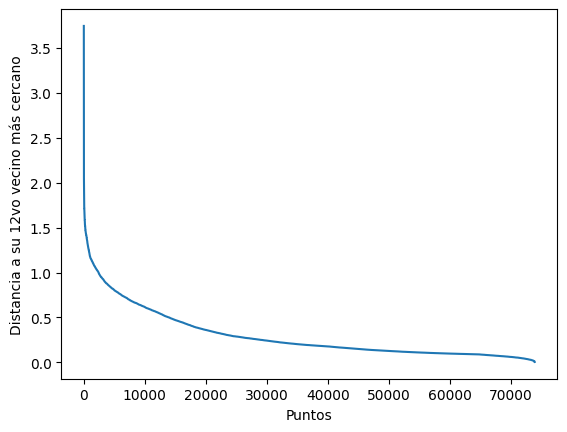

In [176]:
from sklearn.neighbors import NearestNeighbors
#Calculamos la distancia de cada punto a sus 12 puntos más cercanos.
neighbors = NearestNeighbors(n_neighbors=12)
neighbors_fit = neighbors.fit(df_num_std_balanced_data)
distances, indices = neighbors_fit.kneighbors(df_num_std_balanced_data)

#Almacenamos en un arreglo la distancia de cada punto a su 12vo vecino más cercano
#Y se organizan de mayor a menor
distancias_a_12vo_vecino_ordenadas = sorted(distances[:,-1], reverse = True)

#Realizamos el grafico distancia vs puntos
plt.plot(range(len(df_num_std_balanced_data)),distancias_a_12vo_vecino_ordenadas )
plt.ylabel("Distancia a su 12vo vecino más cercano")
plt.xlabel("Puntos")

In [177]:
epsilons = [0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510]
for epsilon in epsilons:
  print("Epsilon {}, Samples {}".format(epsilon, 12))
  db = DBSCAN(eps=epsilon, min_samples=12).fit(df_num_std_balanced_data)
  print(np.unique(db.labels_, return_counts = True))
  print("\n") #Hacer un espacio extra para poder distinguir más facilmente los procedimientons

Epsilon 0.5, Samples 12
(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 17